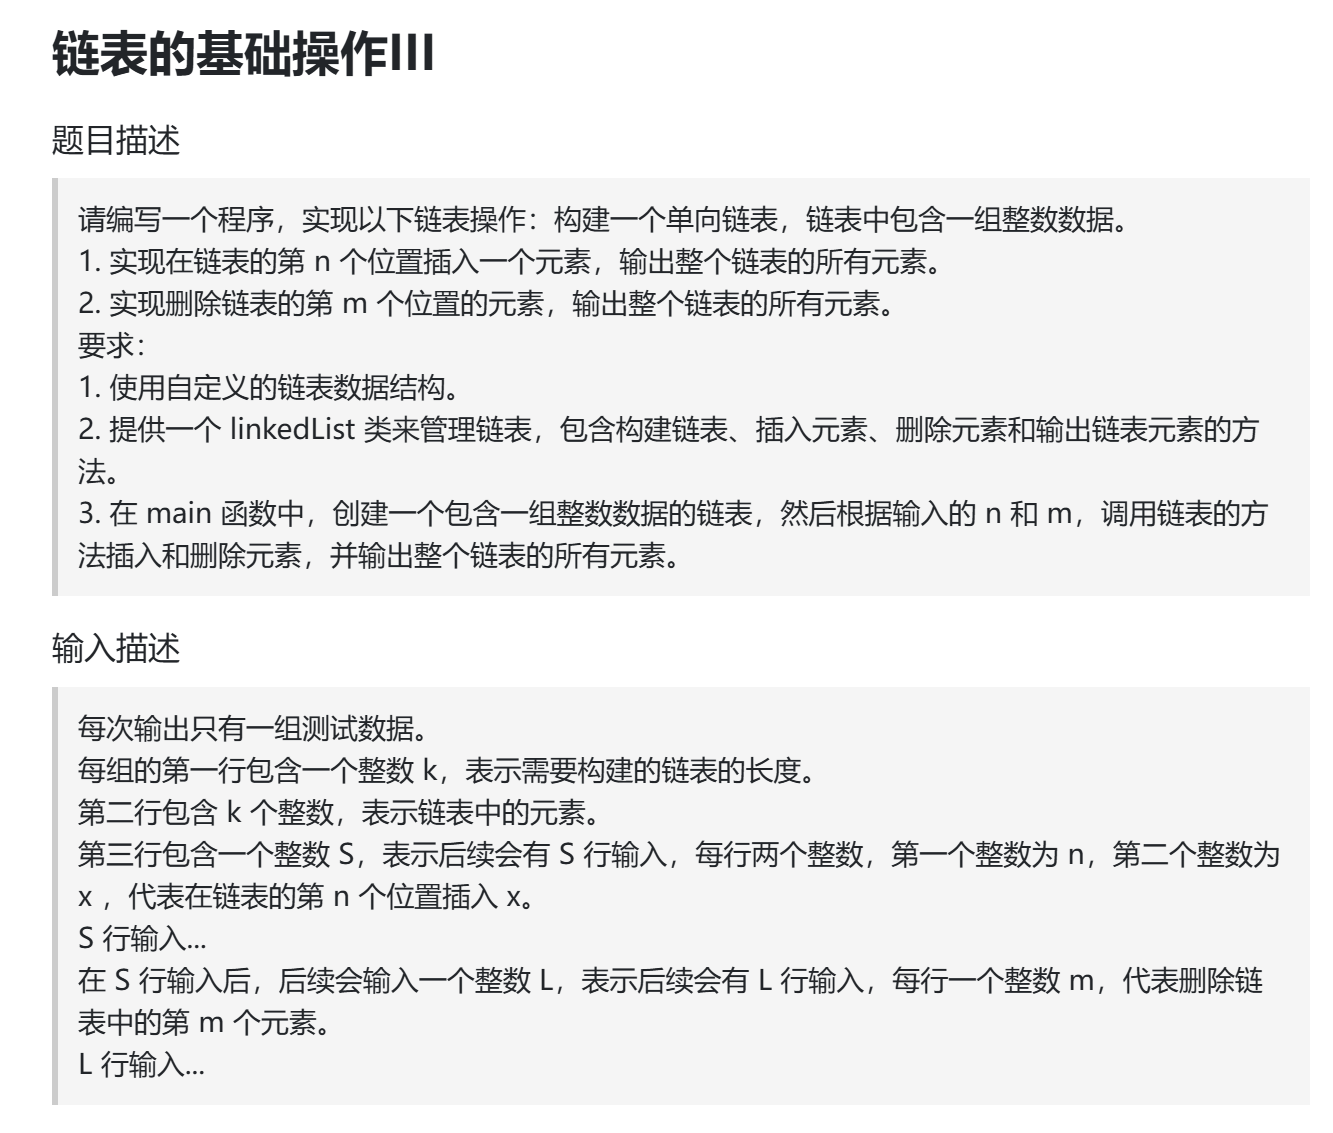
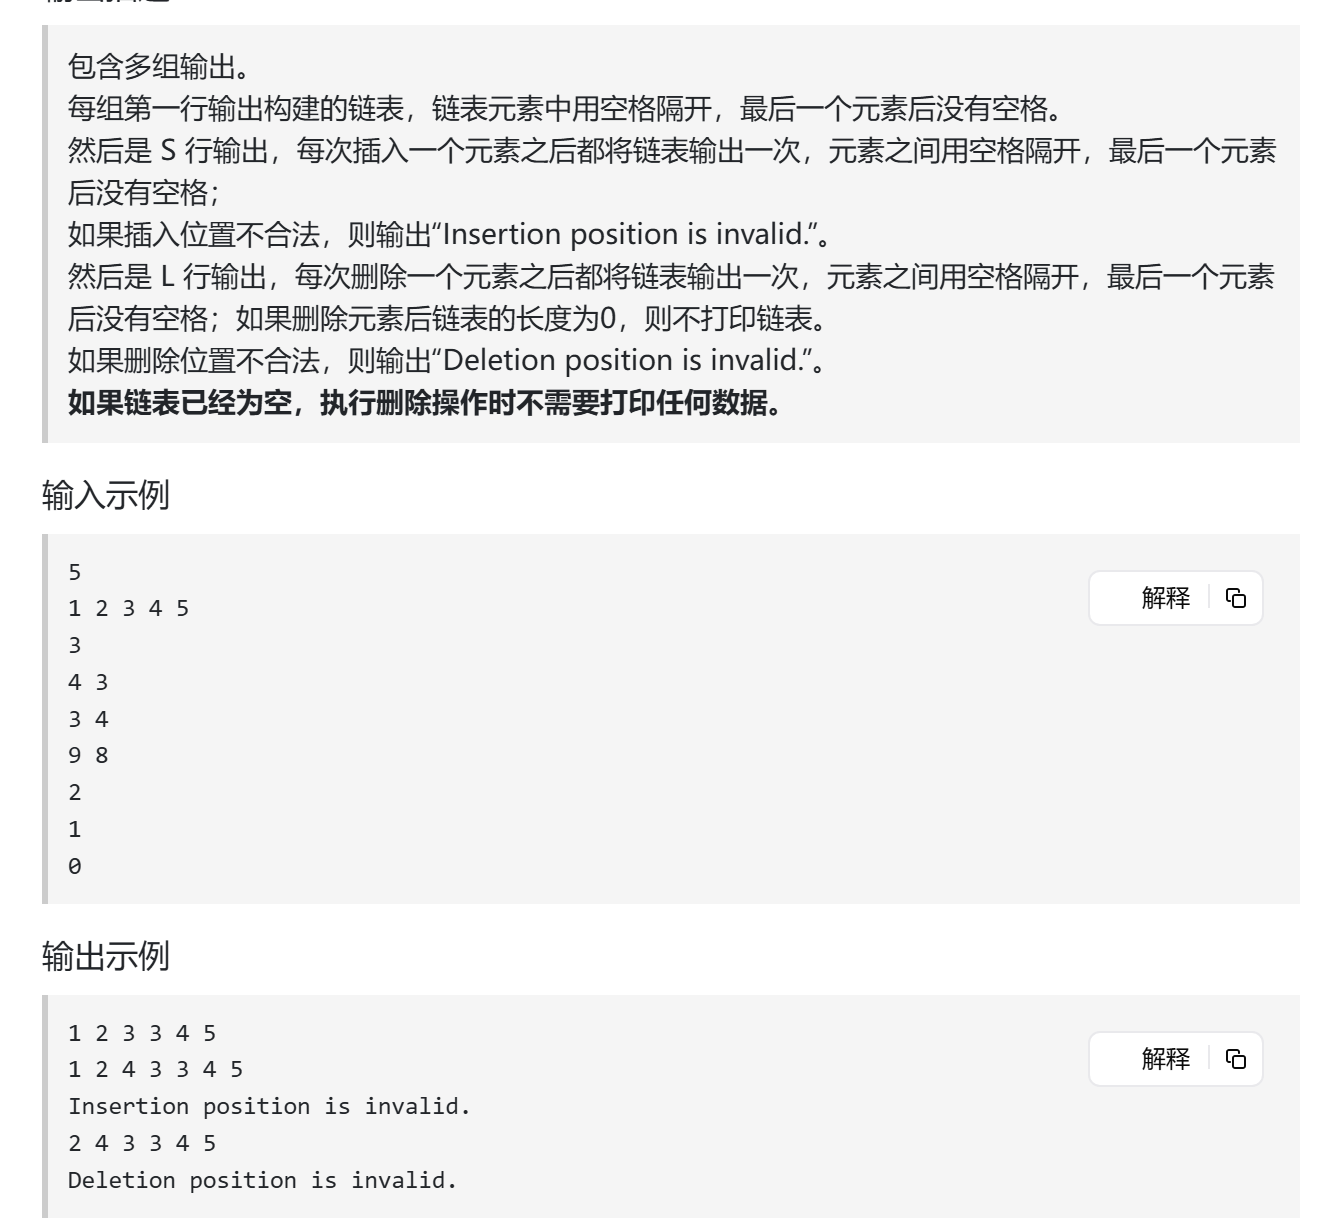